<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Model-Load" data-toc-modified-id="Model-Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Load</a></span></li><li><span><a href="#Guided-Backpropagation" data-toc-modified-id="Guided-Backpropagation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Guided Backpropagation</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li></ul></li><li><span><a href="#Model-Load" data-toc-modified-id="Model-Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Load</a></span><ul class="toc-item"><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li><li><span><a href="#Guided-Backpropagation-+-SmoothGrad" data-toc-modified-id="Guided-Backpropagation-+-SmoothGrad-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Guided Backpropagation + SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../code')

from saliency.attribution_methods import IntegratedGradients
from saliency.ensembles import *
from utils import get_samples, visualize_saliencys

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Guided Backpropagation

In [4]:
IG_mnist = IntegratedGradients(mnist_model)
IG_cifar10 = IntegratedGradients(cifar10_model)

## MNIST

In [11]:
# vanilla gradients
outputs, probs, preds = IG_mnist.generate_image(pre_images_mnist, original_targets_mnist, steps=50)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, IG_mnist, steps=50)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, IG_mnist, steps=50)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, IG_mnist, steps=50)

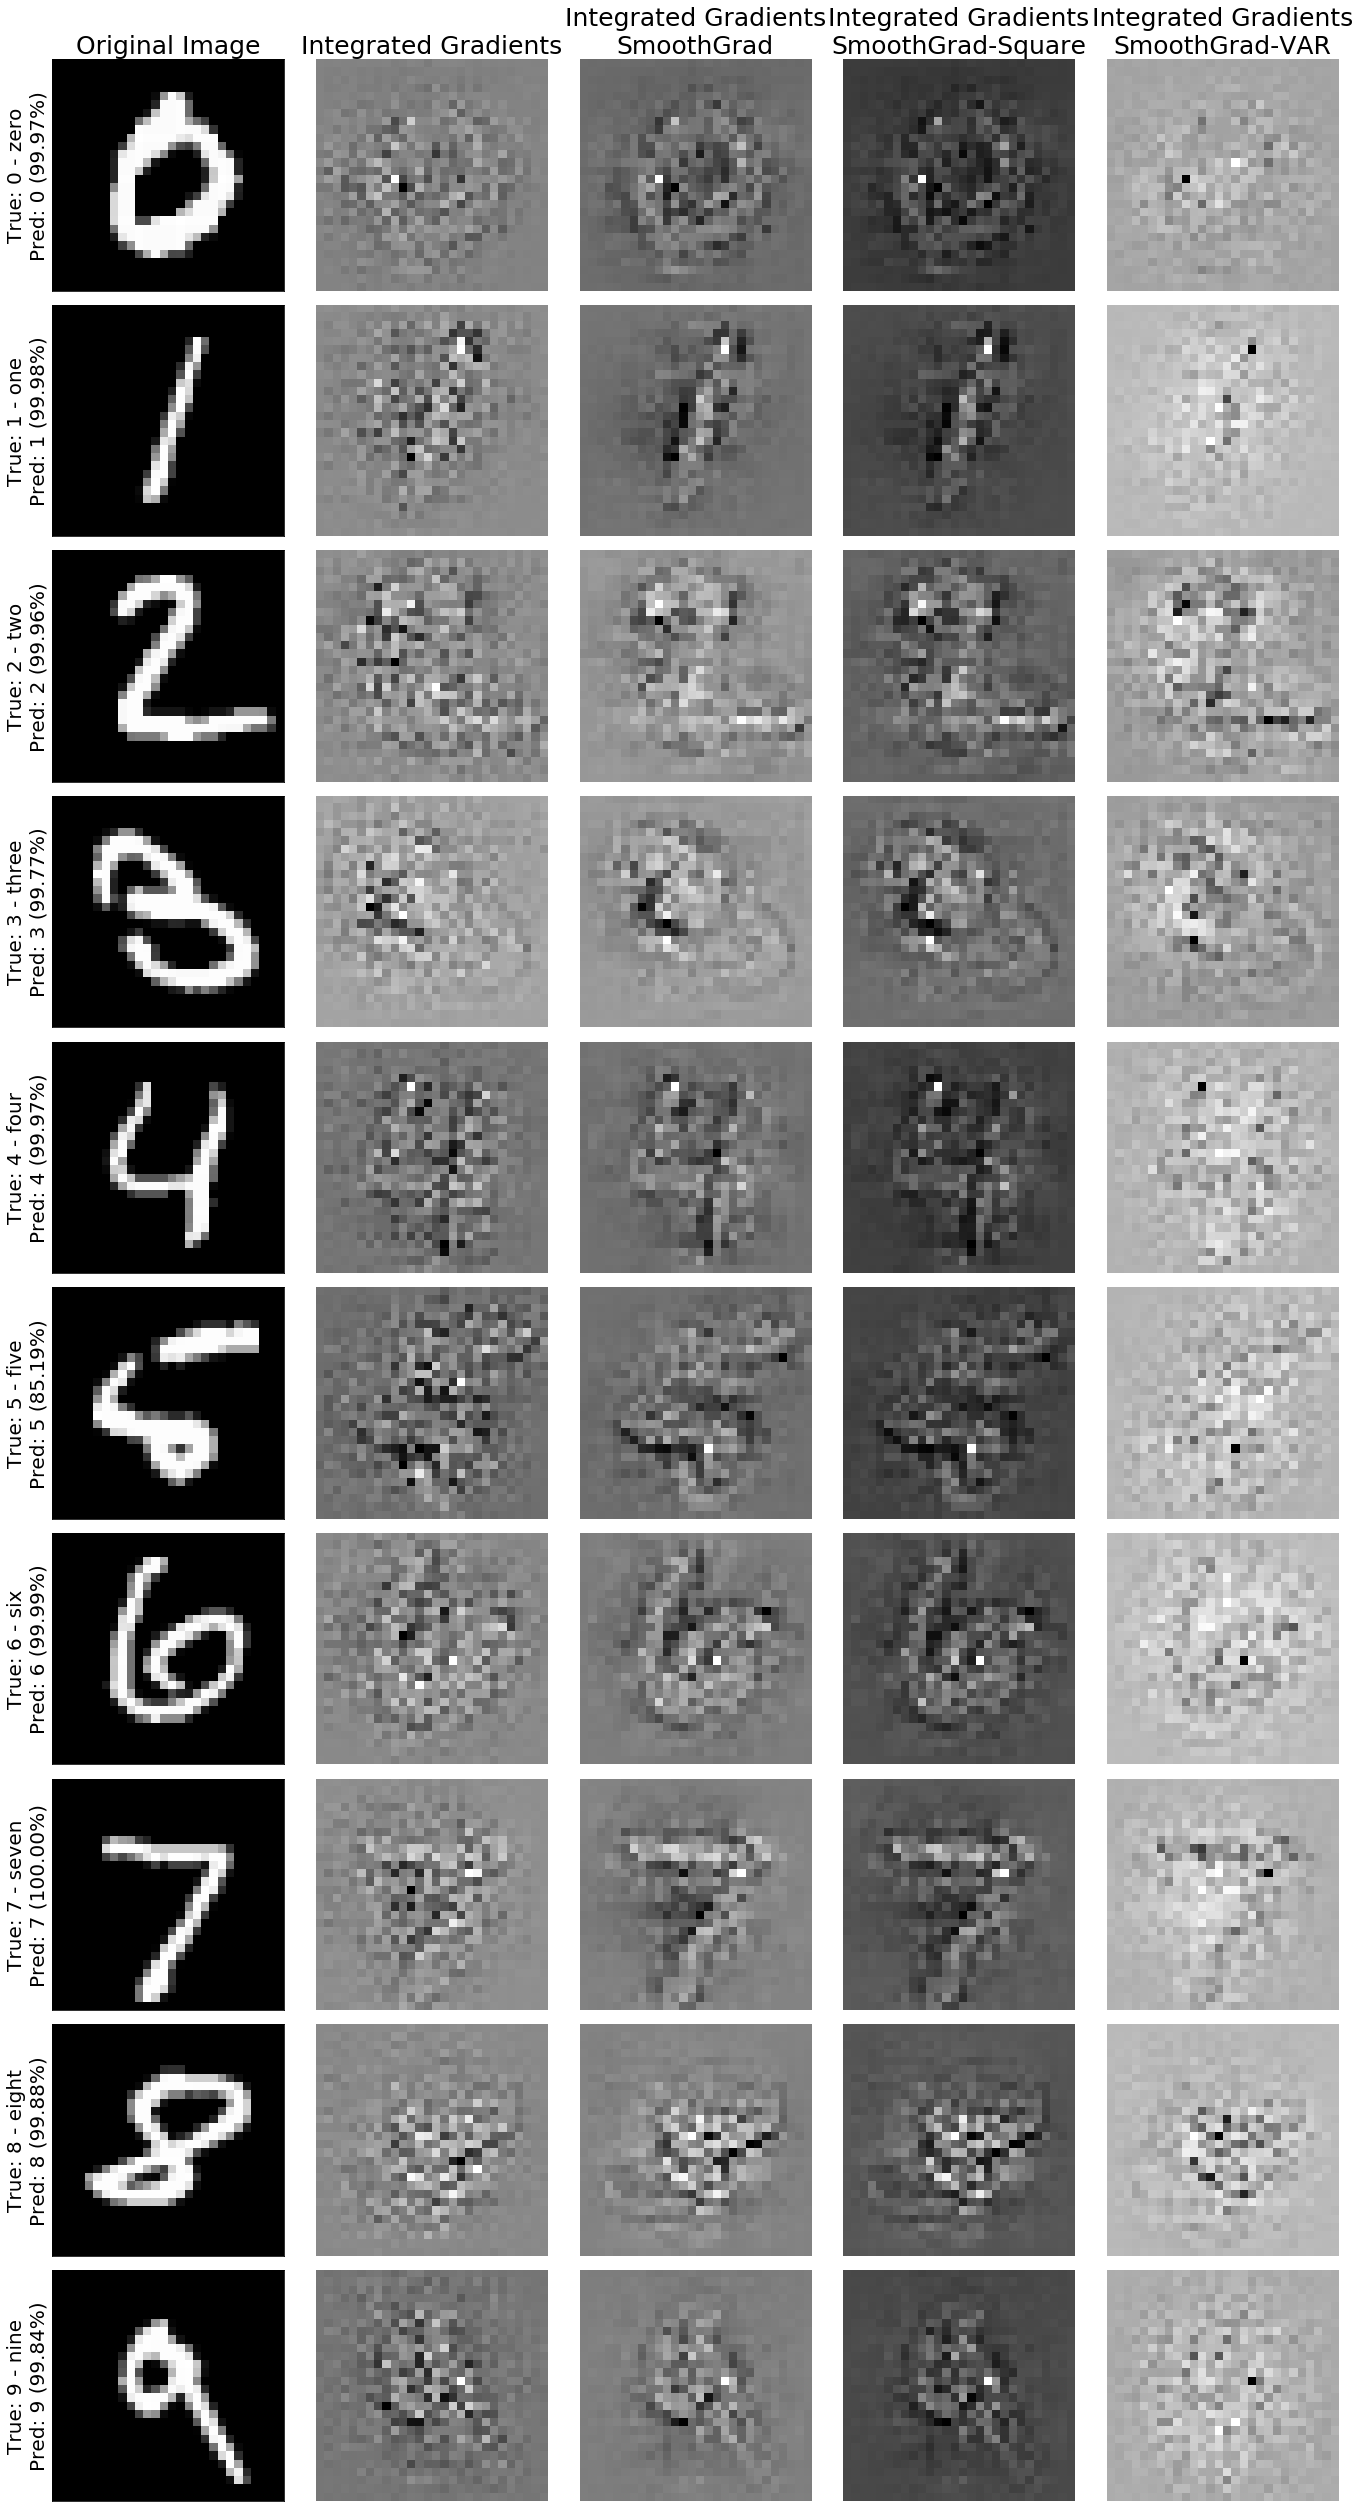

In [12]:
names = ['Integrated Gradients',
         'Integrated Gradients\nSmoothGrad','Integrated Gradients\nSmoothGrad-Square','Integrated Gradients\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

## CIFAR10

In [13]:
# vanilla gradients
outputs, probs, preds = IG_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10)

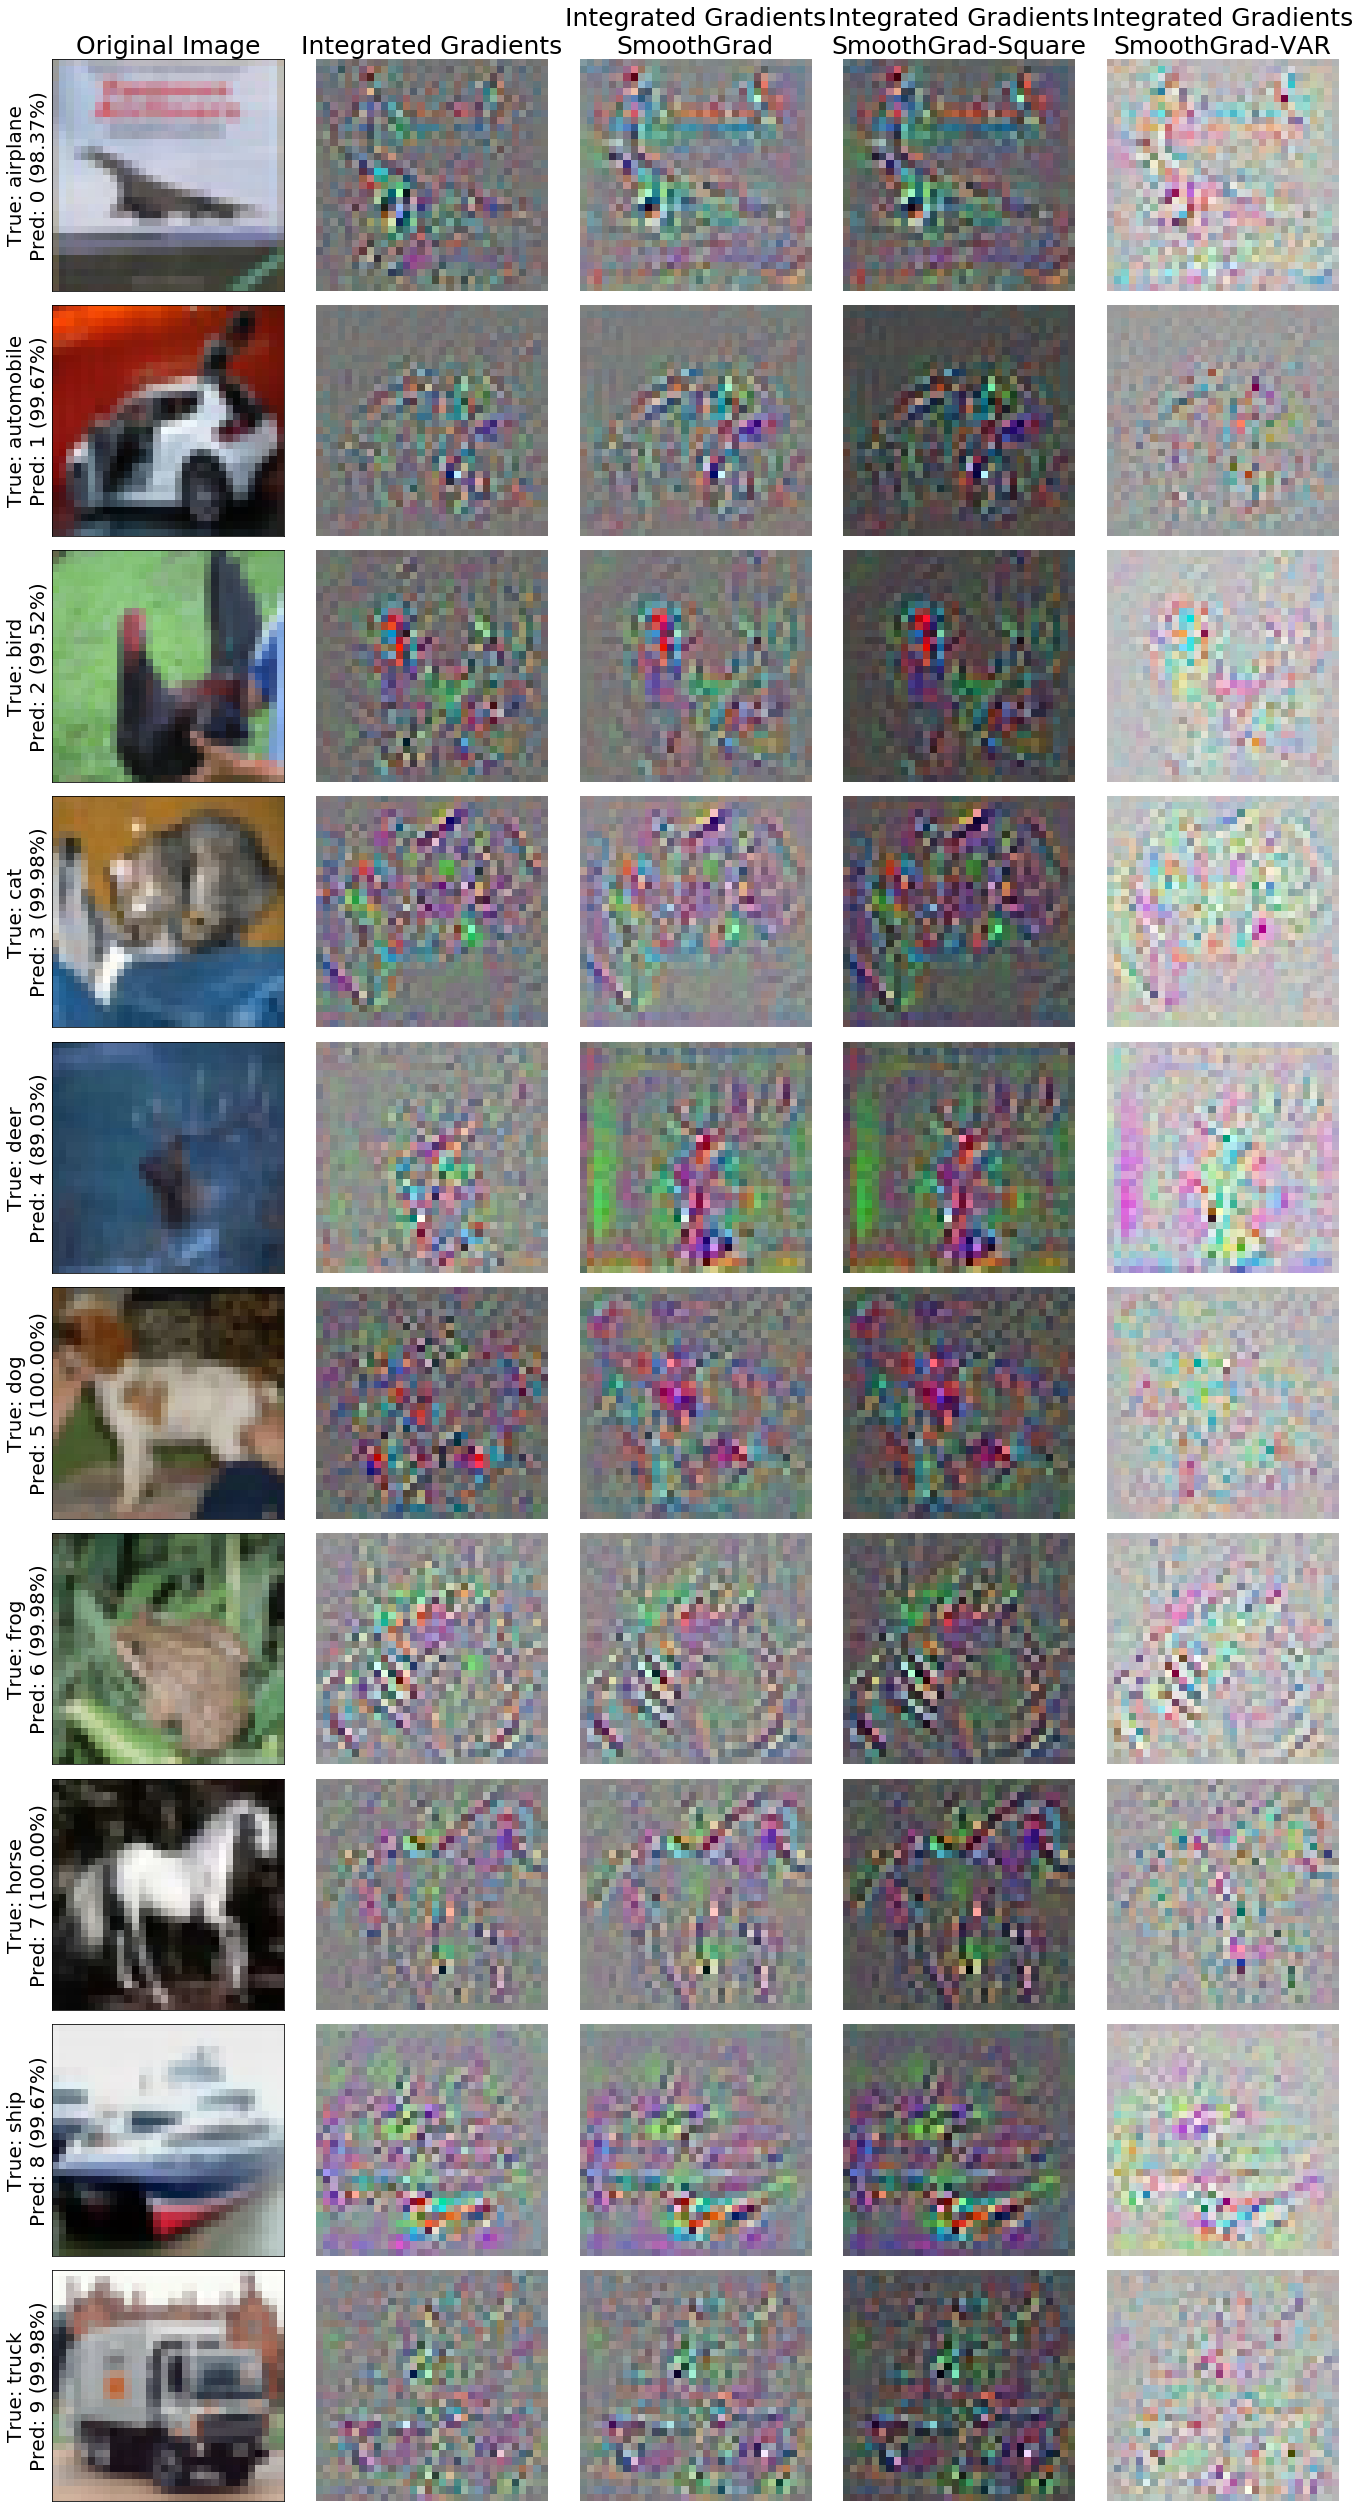

In [14]:
names = ['Integrated Gradients',
         'Integrated Gradients\nSmoothGrad','Integrated Gradients\nSmoothGrad-Square','Integrated Gradients\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

In [15]:
# vanilla gradients
outputs, probs, preds = IG_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, steps=50)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10, steps=50)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10, steps=50)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, IG_cifar10, steps=50)

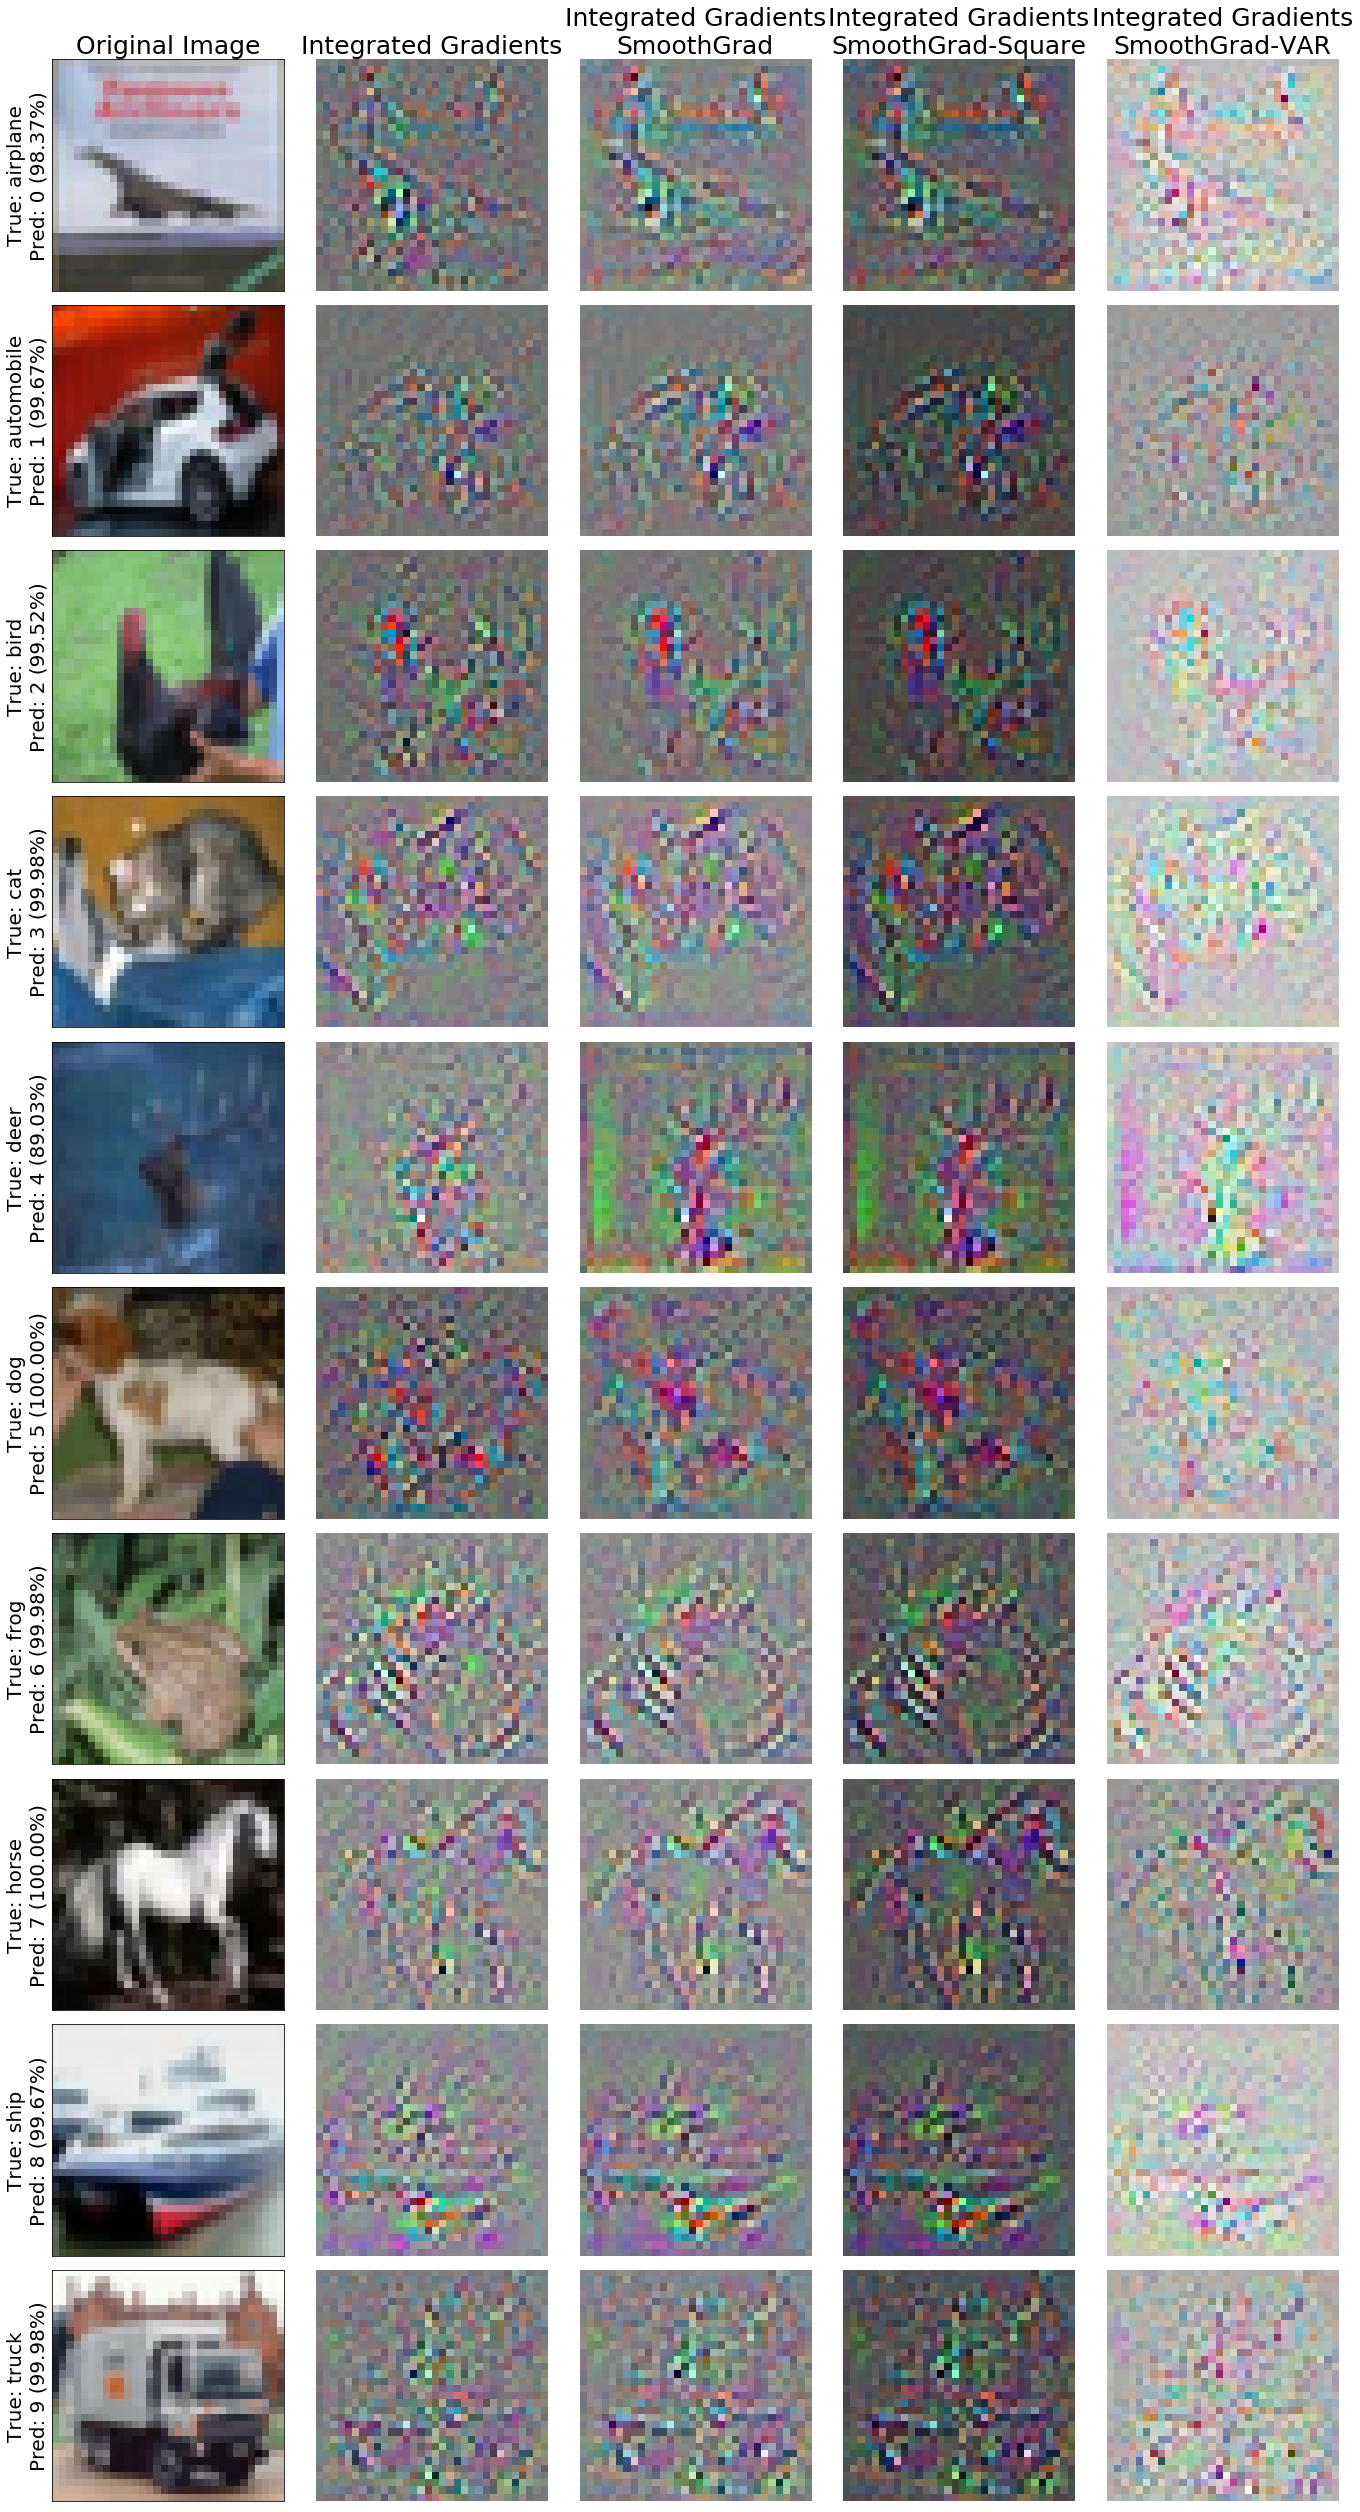

In [16]:
names = ['Integrated Gradients',
         'Integrated Gradients\nSmoothGrad','Integrated Gradients\nSmoothGrad-Square','Integrated Gradients\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)